In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('crosswords_hardness.csv')

In [42]:
data['date'] = pd.to_datetime(data['date'])
day_name = data['date'].dt.day_name()
data['day_name'] = day_name

In [43]:
#get time in minutes decimilized from average_time
def get_time_in_minutes(time):
    dividers = time.count(':')
    if dividers == 1:
        time = time.split(':')
        return float(time[0]) + float(time[1]) / 60
    else:
        time = time.split(':')
        return float(time[0]) * 60 + float(time[1])+ float(time[2]) / 60
data['average_time_in_minutes'] = data['average_time'].apply(get_time_in_minutes)

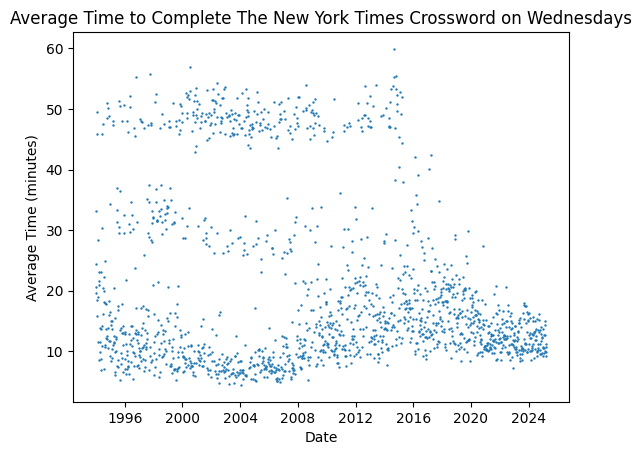

In [44]:
#plot a scatter plot of average time vs date for a monday
monday = data[data['day_name'] == 'Wednesday']
plt.scatter(monday['date'], monday['average_time_in_minutes'],s=0.5)
plt.xlabel('Date')
plt.ylabel('Average Time (minutes)')
plt.title('Average Time to Complete The New York Times Crossword on Wednesdays')
plt.savefig('Images/Average time to complete the crossword on Wednesdays.png')

In [45]:
#start at  june 2016
data = data[data['date'] > '2018-06-01']

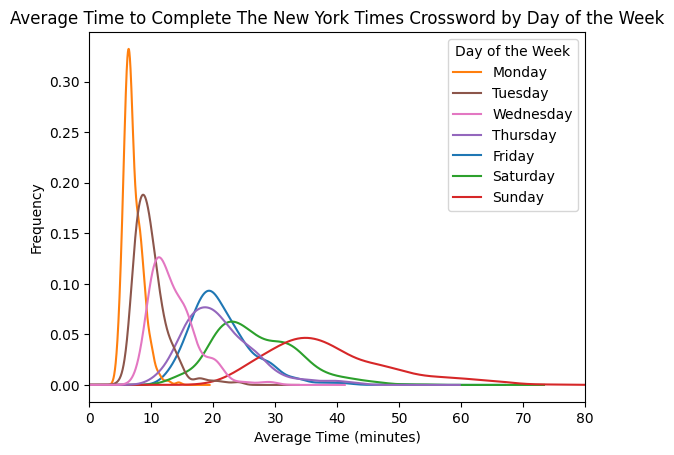

In [46]:
fig, ax = plt.subplots()
#create a histogram of average length binned by day of the week
data.groupby('day_name')['average_time_in_minutes'].plot(kind='kde', ax=ax, alpha=1, legend=True)
handles, labels = plt.gca().get_legend_handles_labels()
wanted_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order = {day: i for i, day in enumerate(wanted_order)}
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: order[t[0]]))
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Day of the Week', loc='upper right')
plt.xlabel('Average Time (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 80)
plt.title('Average Time to Complete The New York Times Crossword by Day of the Week')
plt.savefig('Images/average_time_by_day.png')

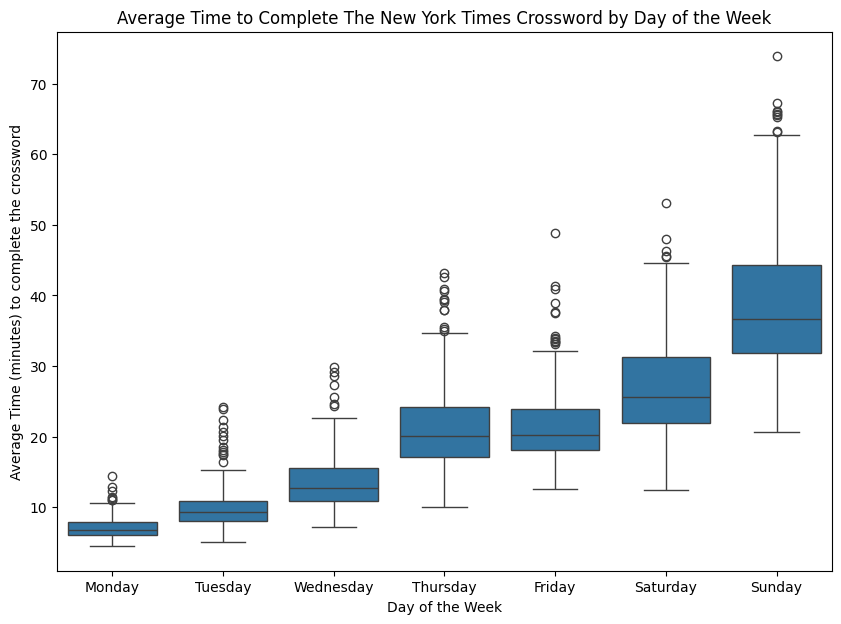

In [47]:

sns.boxplot(x=data['day_name'], y=data['average_time_in_minutes'],order=wanted_order)
plt.xlabel('Day of the Week')
plt.ylabel('Average Time (minutes) to complete the crossword')
plt.title('Average Time to Complete The New York Times Crossword by Day of the Week')
plt.savefig('crossword_time_by_day.png')
#make plot larger
fig = plt.gcf()
fig.set_size_inches(10, 7)

In [48]:
import Main_crossword_functions as mcf


In [49]:
empty_spaces=[]
for i in range(len(data)):
    crossword = mcf.opening_file(data['date'][i].strftime('%Y-%m-%d'))
    if crossword == None:
        empty_spaces.append(None)
    else:
        metadata,answers,clues = mcf.split_sections(crossword)
        empty_spaces.append(mcf.empty_spaces(answers))
data['empty_spaces'] = empty_spaces

The file for the date 2025-03-27 does not exist
The file for the date 2025-03-26 does not exist
The file for the date 2025-03-25 does not exist
The file for the date 2025-03-24 does not exist
The file for the date 2025-03-23 does not exist
The file for the date 2025-03-22 does not exist
The file for the date 2025-03-21 does not exist
The file for the date 2025-03-20 does not exist
The file for the date 2025-03-19 does not exist
The file for the date 2025-03-18 does not exist
The file for the date 2025-03-17 does not exist
The file for the date 2025-03-16 does not exist
The file for the date 2025-03-15 does not exist
The file for the date 2025-03-14 does not exist
The file for the date 2025-03-13 does not exist
The file for the date 2025-03-12 does not exist
The file for the date 2025-03-11 does not exist
The file for the date 2025-03-10 does not exist
The file for the date 2025-03-09 does not exist
The file for the date 2025-03-08 does not exist
The file for the date 2025-03-07 does no

In [50]:
filled_spaces=[]
for i in range(len(data)):
    crossword = mcf.opening_file(data['date'][i].strftime('%Y-%m-%d'))
    if crossword == None:
        filled_spaces.append(None)
    else:
        metadata,answers,clues = mcf.split_sections(crossword)
        filled_spaces.append(mcf.filled_spaces(answers))
data['filled_spaces'] = filled_spaces

The file for the date 2025-03-27 does not exist
The file for the date 2025-03-26 does not exist
The file for the date 2025-03-25 does not exist
The file for the date 2025-03-24 does not exist
The file for the date 2025-03-23 does not exist
The file for the date 2025-03-22 does not exist
The file for the date 2025-03-21 does not exist
The file for the date 2025-03-20 does not exist
The file for the date 2025-03-19 does not exist
The file for the date 2025-03-18 does not exist
The file for the date 2025-03-17 does not exist
The file for the date 2025-03-16 does not exist
The file for the date 2025-03-15 does not exist
The file for the date 2025-03-14 does not exist
The file for the date 2025-03-13 does not exist
The file for the date 2025-03-12 does not exist
The file for the date 2025-03-11 does not exist
The file for the date 2025-03-10 does not exist
The file for the date 2025-03-09 does not exist
The file for the date 2025-03-08 does not exist
The file for the date 2025-03-07 does no

In [51]:
data['average_normalized_time'] = data['average_time_in_minutes'] / data['filled_spaces']

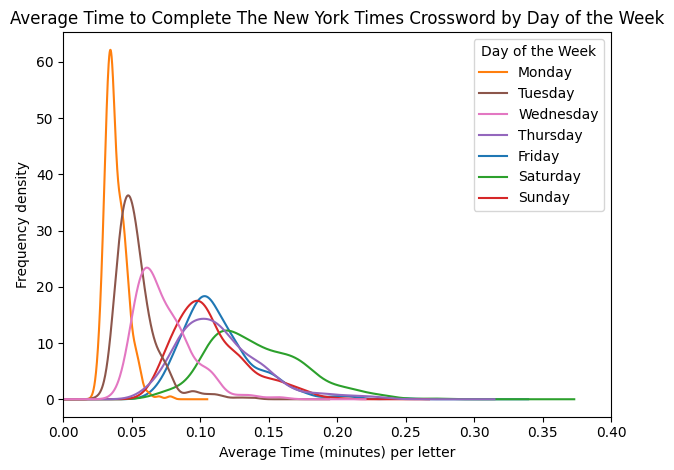

In [52]:
fig, ax = plt.subplots()
#create a histogram of average length binned by day of the week
data.groupby('day_name')['average_normalized_time'].plot(kind='kde', ax=ax, alpha=1, legend=True)
handles, labels = plt.gca().get_legend_handles_labels()
wanted_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order = {day: i for i, day in enumerate(wanted_order)}
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: order[t[0]]))
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Day of the Week', loc='upper right')
plt.xlabel('Average Time (minutes) per letter')
plt.ylabel('Frequency density')
plt.xlim(0, 0.4)

plt.title('Average Time to Complete The New York Times Crossword by Day of the Week')
plt.tight_layout()
plt.savefig('Images/crossword_time_per_letter_by_day.png')

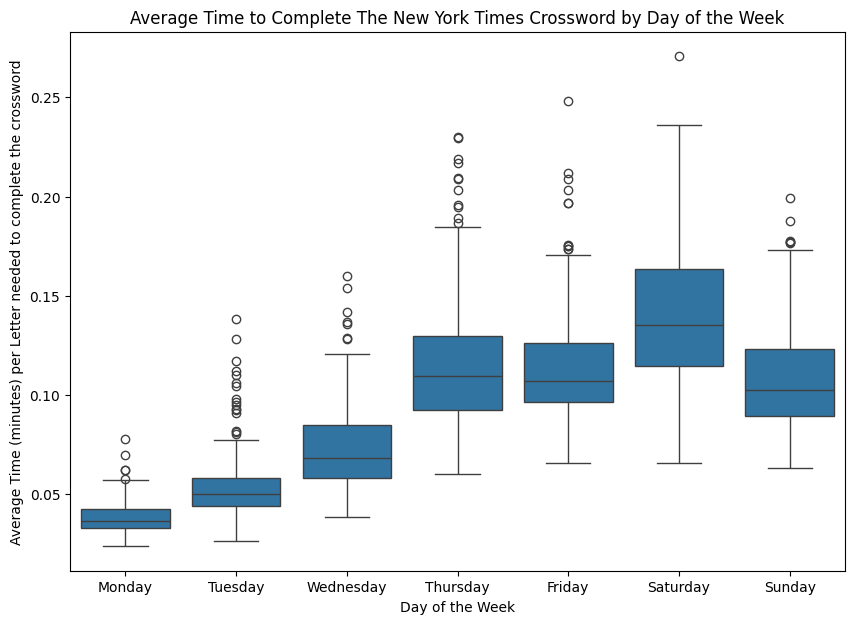

In [30]:


sns.boxplot(x=data['day_name'], y=data['average_normalized_time'],order=wanted_order)
plt.xlabel('Day of the Week')
plt.ylabel('Average Time (minutes) per Letter needed to complete the crossword')
plt.title('Average Time to Complete The New York Times Crossword by Day of the Week')
#make plot larger
fig = plt.gcf()
fig.set_size_inches(10, 7)
#save as png
plt.savefig('crossword_normalised_time_by_day_of_week.png')
plt.show()

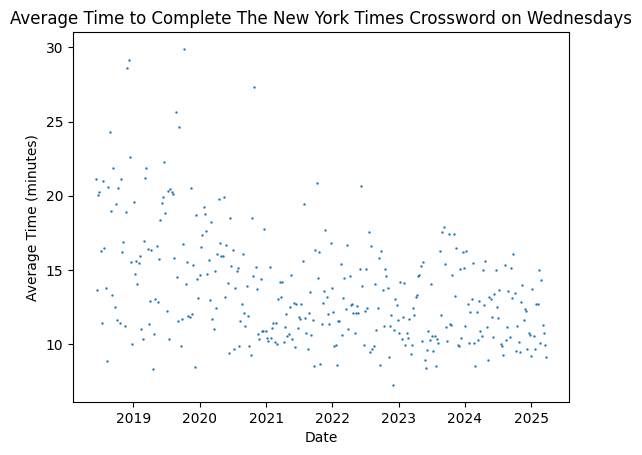